In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/gld_price_data.csv')

In [118]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [119]:
data.drop('Date',axis=1,inplace=True)

In [120]:
data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: >

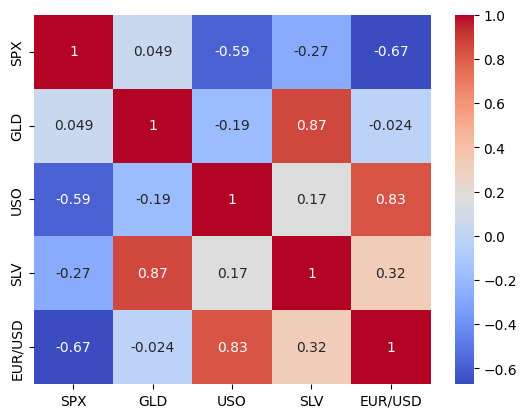

In [121]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

<Axes: xlabel='GLD', ylabel='Count'>

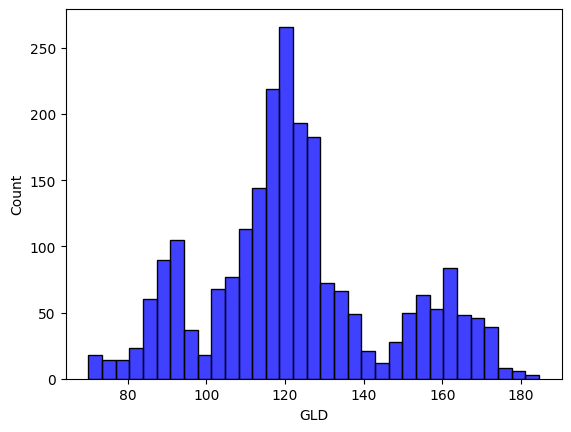

In [122]:
sns.histplot(data['GLD'],color='b')

In [123]:
X=data.drop(['GLD'],axis=1)
Y=data['GLD']

In [124]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [125]:
Y.head()

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999


In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
random_forest=RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,Y_train)

RandomForestRegressor()

In [127]:
random_forest.score(X_train,Y_train)

0.9981210703563435

In [128]:
random_forest.score(X_test,Y_test)

0.9894687780164642

In [129]:
Y_pred=random_forest.predict(X_test)

In [130]:
#Model Explains the variance from the Target Variable
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9894687780164642


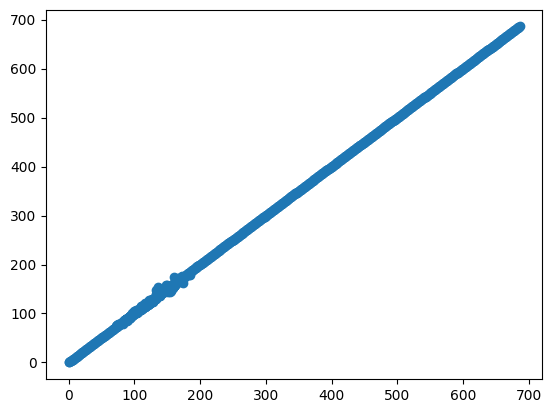

In [140]:
plt.scatter(Y_test,Y_pred)

In [132]:
Y_test=pd.DataFrame(Y_test)
Y_test.describe()

,GLD
count,687.000000
mean,121.768157
std,22.604779
min,71.709999
25%,109.534999
50%,120.029999
75%,129.345001
max,184.589996


In [133]:
Y_pred=pd.DataFrame(Y_pred, columns=['GLD'])
Y_pred.describe()

,GLD
count,687.000000
mean,121.847872
std,22.378850
min,72.824500
25%,108.956100
50%,120.024800
75%,129.056798
max,179.277299


In [134]:
Y_pred['s.no']=Y_pred.index
Y_test['s.no']=Y_pred.index

In [135]:
Y_pred.tail()

,GLD,s.no
682,168.465195,682
683,121.877300,683
684,115.020301,684
685,85.804200,685
686,111.325300,686


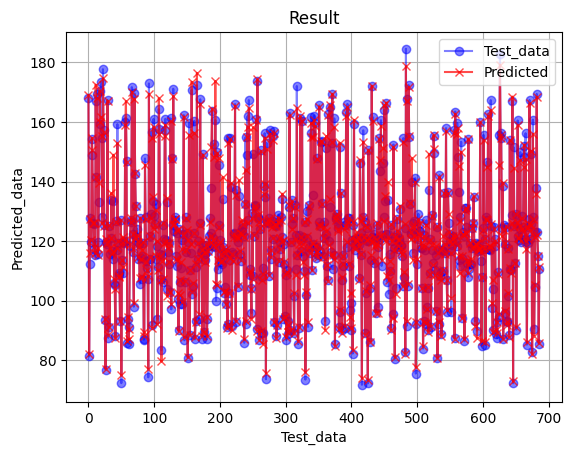

In [137]:
plt.figure()
plt.plot(Y_test['s.no'],Y_test['GLD'],label='Test_data', color='blue', marker='o',alpha=0.5)
plt.plot(Y_pred['s.no'],Y_pred['GLD'],label='Predicted', color='red', marker='x',alpha=0.7)

plt.xlabel('Test_data')
plt.ylabel('Predicted_data')
plt.title('Result')

plt.legend()

plt.grid(True)
plt.show()